# CANCER (2017) ANALYSIS. DATA PRE-PROCESSING:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
def leave_digits(x):
    x = x.replace('\x86', '0') #replace crosses (nan values for this dataset) to 0 
    return re.sub('[^0-9]', '', x)


def count_to_categorical(cnt):
    if cnt <= 500:
        return 'cat_0'
    elif cnt <= 1000:
        return 'cat_1'
    else:
        return 'cat_2'

In [3]:
#duomenų tvarkymui naudotas encoding
df = pd.read_csv('/Users/kriri/Desktop/Python_stuff/cancer2017.csv', encoding = 'ISO-8859-1')
df.head(n=5)

,State,Brain/ nervous system,Female breast,Colon & rectum,Leukemia,Liver,Lung & bronchus,Non-Hodgkin Lymphoma,Ovary,Pancreas,Prostate
0,Alabama,320,650,940,420,470,"3,200",320,250,710,450
1,Alaska,,70,100,,60,280,,,80,50
2,Arizona,380,810,"1,020",550,660,"2,820",430,310,930,600
3,Arkansas,180,420,600,250,280,"2,160",210,150,430,260
4,California,1830,4440,5240,2610,3750,"12,000",2140,1530,4510,3130


ANOTACIJA | TIKSLAI:

-Analizei pasirinktas USA 2017 metų vėžinių susirgimų iš 51 valstijos datasetas su 11 vėžinių susirgimų. 

Tikslai: 

-Nustatyti valstijas, 
kuriose susirgimų skaičius buvo aukščiausias ir vice versa; 

-Išskirtinai išsiaiškinti apie leukemijos paplitimo skaičių;

-Palyginti koreliacijas tarp valstijų;

-Išskirtinai palyginti leukemijos ir kepenų vėžio atvejus;

-Patikrinti hipotezę dėl leukemijos ir kepenų vėžio ryšio;

-Susiskirstyti leukemijos sergamumo skaičius rėžiais (kategorijomis iki 500, nuo 500 iki 1000, nuo 1000 iki likusių verčių ir panagrinėti duomenis pagal šias kategorijas.

In [4]:
df.shape

(51, 11)

In [5]:
df.columns

Index(['State', 'Brain/ nervous system', 'Female breast', 'Colon & rectum',
       'Leukemia', 'Liver', 'Lung & bronchus', 'Non-Hodgkin Lymphoma', 'Ovary',
       'Pancreas', 'Prostate'],
      dtype='object')

In [6]:
cancer_names = df.drop(columns=['State']).columns

In [7]:
cancer_names

Index(['Brain/ nervous system', 'Female breast', 'Colon & rectum', 'Leukemia',
       'Liver', 'Lung & bronchus', 'Non-Hodgkin Lymphoma', 'Ovary', 'Pancreas',
       'Prostate'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=51, step=1)

In [9]:
df.head()

,State,Brain/ nervous system,Female breast,Colon & rectum,Leukemia,Liver,Lung & bronchus,Non-Hodgkin Lymphoma,Ovary,Pancreas,Prostate
0,Alabama,320,650,940,420,470,"3,200",320,250,710,450
1,Alaska,,70,100,,60,280,,,80,50
2,Arizona,380,810,"1,020",550,660,"2,820",430,310,930,600
3,Arkansas,180,420,600,250,280,"2,160",210,150,430,260
4,California,1830,4440,5240,2610,3750,"12,000",2140,1530,4510,3130


In [10]:
df.tail()

,State,Brain/ nervous system,Female breast,Colon & rectum,Leukemia,Liver,Lung & bronchus,Non-Hodgkin Lymphoma,Ovary,Pancreas,Prostate
46,Virginia,390,1060,1190,550,670,"3,810",490,370,1080,650
47,Washington,410,850,970,520,680,"3,100",460,330,920,620
48,West Virginia,110,280,430,190,170,"1,450",160,90,280,160
49,Wisconsin,360,740,880,540,440,"3,070",420,220,870,570
50,Wyoming,,60,80,60,,220,,,70,


In [11]:
df.dtypes

State                    object
Brain/ nervous system    object
Female breast            object
Colon & rectum           object
Leukemia                 object
Liver                    object
Lung & bronchus          object
Non-Hodgkin Lymphoma     object
Ovary                    object
Pancreas                 object
Prostate                 object
dtype: object

In [12]:
for column_name in cancer_names:
    df[column_name] = df[column_name].apply(leave_digits).astype(int)

In [13]:
df.dtypes

State                    object
Brain/ nervous system     int64
Female breast             int64
Colon & rectum            int64
Leukemia                  int64
Liver                     int64
Lung & bronchus           int64
Non-Hodgkin Lymphoma      int64
Ovary                     int64
Pancreas                  int64
Prostate                  int64
dtype: object

In [14]:
df['all'] = df.drop(columns=['State']).sum(axis=1)

In [15]:
df.head(10)

,State,Brain/ nervous system,Female breast,Colon & rectum,Leukemia,Liver,Lung & bronchus,Non-Hodgkin Lymphoma,Ovary,Pancreas,Prostate,all
0,Alabama,320,650,940,420,470,3200,320,250,710,450,7730
1,Alaska,0,70,100,0,60,280,0,0,80,50,640
2,Arizona,380,810,1020,550,660,2820,430,310,930,600,8510
3,Arkansas,180,420,600,250,280,2160,210,150,430,260,4940
4,California,1830,4440,5240,2610,3750,12000,2140,1530,4510,3130,41180
5,Colorado,270,570,660,340,380,1640,260,240,580,450,5390
6,Connecticut,190,430,450,300,300,1630,230,170,490,310,4500
7,Delaware,50,130,150,70,110,590,70,50,150,90,1460
8,District of Columbia,0,100,90,0,90,220,0,0,100,70,670
9,Florida,1250,2910,3620,1800,2020,11790,1510,970,3170,2050,31090


# DATA ANALYSIS:

In [16]:
df.Leukemia

0      420
1        0
2      550
3      250
4     2610
5      340
6      300
7       70
8        0
9     1800
10     620
11      90
12     110
13     990
14     550
15     260
16     260
17     390
18     320
19     130
20     410
21     540
22     830
23     480
24     230
25     550
26      80
27     150
28     200
29     110
30     640
31     150
32    1460
33     760
34      60
35     990
36     340
37     320
38    1210
39      90
40     380
41      90
42     570
43    1690
44     170
45      50
46     550
47     520
48     190
49     540
50      60
Name: Leukemia, dtype: int64

[Text(0, 0.5, 'Cases amount fraction'),
 Text(0.5, 0, 'Cancer cases amount'),
 Text(0.5, 1.0, 'LEUKEMIA HISTOGRAM')]

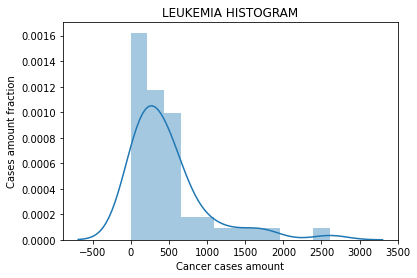

In [17]:
#mane domina pamatyti koks leukemijos susirgimu kiekis sitame datasete dazniausiai pasitaikydavo
#ziurint per visas states
ax = sns.distplot(df.Leukemia)
ax.set(xlabel='Cancer cases amount', ylabel='Cases amount fraction', title='LEUKEMIA HISTOGRAM')


In [18]:
top5_all = df.sort_values(by='all', ascending=False).head(5)[['State', 'all']]
top5_all

,State,all
4,California,41180
9,Florida,31090
43,Texas,28210
32,New York,24420
38,Pennsylvania,19850


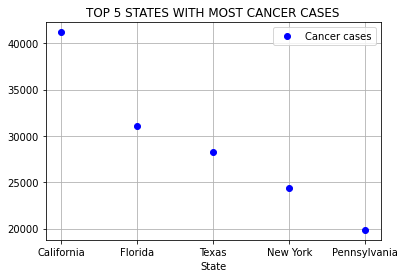

In [19]:
#pasiziuriu top5 valstijas su daugiausia susirgimu
plt.plot(top5_all['State'], top5_all['all'], 'bo', label='Cancer cases')
plt.grid()
plt.title('TOP 5 STATES WITH MOST CANCER CASES')
plt.xlabel('State')
plt.legend()

In [20]:
top5_minimal_amount = df.sort_values(by='all', ascending=True).head(5)[['State', 'all']]
top5_minimal_amount

,State,all
50,Wyoming,490
1,Alaska,640
8,District of Columbia,670
34,North Dakota,750
45,Vermont,900


([<matplotlib.axis.XTick at 0x11d7a48e0>,
 <a list of 5 Text major ticklabel objects>)

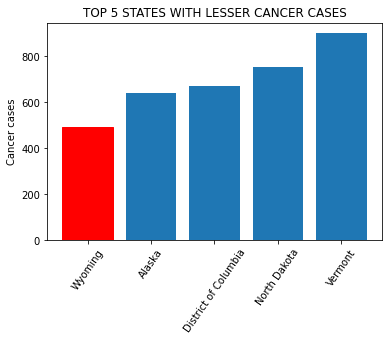

In [21]:
#paziuriu top5 states kur susergama maziausiai
barlist = plt.bar(top5_minimal_amount['State'], top5_minimal_amount['all'])
barlist[0].set_color('r')
plt.title('TOP 5 STATES WITH LESSER CANCER CASES')
plt.ylabel('Cancer cases')
plt.xticks(top5_minimal_amount['State'], rotation=55)

In [22]:
#aš neturiu kategorinių variables šitame dataset'e apart STATE, iš kurios nebūtų tikslinga kažka daryti su kateg. 
#kintamaisiais, tai sintetiškai susiskirsčiau į categories 
#su rėžiais Leukemia cases iki 500, 500-1000 ir nuo 1000 iki...

In [23]:
df['Leukemia_cat'] = df['Leukemia'].apply(count_to_categorical)

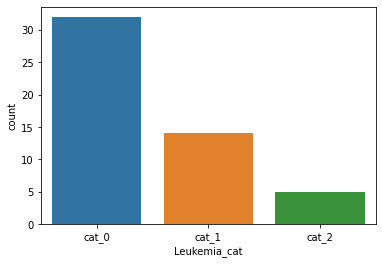

In [24]:
sns.countplot(df['Leukemia_cat'])

In [25]:
df.drop(columns=['State']).groupby('Leukemia_cat').agg(['sum', 'min', 'max']) 

Brain/ nervous system            Female breast              \
                               sum  min   max           sum   min   max   
Leukemia_cat                                                              
cat_0                         4480    0   320         10530    60   820   
cat_1                         6280  330   640         15570   740  1690   
cat_2                         5790  700  1830         14490  1900  4440   

             Colon & rectum             Leukemia  ... Ovary Pancreas        \
                        sum   min   max      sum  ...   max      sum   min   
Leukemia_cat                                      ...                        
cat_0                 13730    80   940     6500  ...   260    11480    70   
cat_1                 18700   880  2130     9200  ...   570    16310   870   
cat_2                 17820  2390  5240     8770  ...  1530    15320  2110   

                   Prostate                 all                
               max      sum   min   max     sum    min    max  
Leukemia_cat                                                   
cat_0          840     7310     0   470  114070    490   7730  
cat_1         1810     9800   500  1040  161470   8110  18000  
cat_2         4510     9590  1200  3130  144750  19850  41180  

[3 rows x 33 columns]

In [26]:
cancer_names_fraction = [cn + '_fraction' for cn in cancer_names]

In [27]:
for column_name in cancer_names:
    df[f'{column_name}_fraction'] = df[column_name] / df['all']

In [28]:
df[cancer_names_fraction].corr()

,Brain/ nervous system_fraction,Female breast_fraction,Colon & rectum_fraction,Leukemia_fraction,Liver_fraction,Lung & bronchus_fraction,Non-Hodgkin Lymphoma_fraction,Ovary_fraction,Pancreas_fraction,Prostate_fraction
Brain/ nervous system_fraction,1.000000,-0.366978,-0.604899,0.213491,0.056993,-0.383959,0.698749,0.605681,-0.448462,0.151760
Female breast_fraction,-0.366978,1.000000,0.396417,-0.123594,0.309241,-0.509097,-0.336884,-0.151219,0.652646,0.287692
Colon & rectum_fraction,-0.604899,0.396417,1.000000,0.072921,-0.163372,0.018272,-0.559269,-0.559201,0.405155,-0.023601
Leukemia_fraction,0.213491,-0.123594,0.072921,1.000000,-0.696308,-0.034846,0.165775,0.105606,-0.009885,-0.417394
Liver_fraction,0.056993,0.309241,-0.163372,-0.696308,1.000000,-0.521070,0.157121,0.221984,0.155552,0.421669
Lung & bronchus_fraction,-0.383959,-0.509097,0.018272,-0.034846,-0.521070,1.000000,-0.423566,-0.515982,-0.327981,-0.551119
Non-Hodgkin Lymphoma_fraction,0.698749,-0.336884,-0.559269,0.165775,0.157121,-0.423566,1.000000,0.856492,-0.535598,-0.036992
Ovary_fraction,0.605681,-0.151219,-0.559201,0.105606,0.221984,-0.515982,0.856492,1.000000,-0.422206,0.080682
Pancreas_fraction,-0.448462,0.652646,0.405155,-0.009885,0.155552,-0.327981,-0.535598,-0.422206,1.000000,0.263631
Prostate_fraction,0.151760,0.287692,-0.023601,-0.417394,0.421669,-0.551119,-0.036992,0.080682,0.263631,1.000000


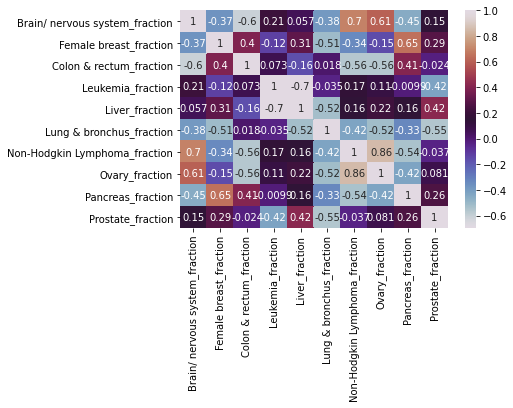

In [29]:
#kaip koreliuoja susirgimų count per skirtingas valstijas, vertės išreikštos fractions
sns.heatmap(df[cancer_names_fraction].corr(), cmap='twilight', annot=True)


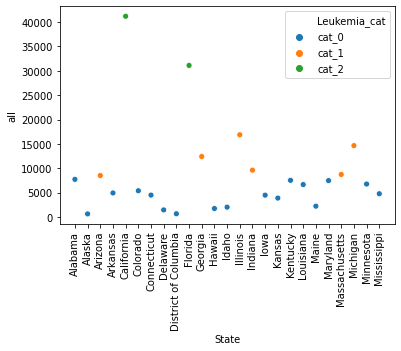

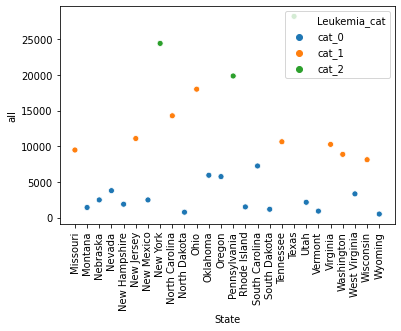

In [30]:
#pažiūriu kaip išsideėtę leukemijos susirgimai pagal suformuotus rėžius
chart = sns.scatterplot(df['State'].iloc[:25], df['all'].iloc[:25], hue=df['Leukemia_cat'])
_ = plt.xticks(rotation=90)
fig = plt.figure()
chart = sns.scatterplot(df['State'].iloc[25:], df['all'].iloc[25:], hue=df['Leukemia_cat'])
_ = plt.xticks(rotation=90)

In [31]:
df.median()

Brain/ nervous system              250.000000
Female breast                      570.000000
Colon & rectum                     710.000000
Leukemia                           340.000000
Liver                              390.000000
Lung & bronchus                   2450.000000
Non-Hodgkin Lymphoma               290.000000
Ovary                              200.000000
Pancreas                           580.000000
Prostate                           370.000000
all                               5930.000000
Brain/ nervous system_fraction       0.038993
Female breast_fraction               0.093596
Colon & rectum_fraction              0.120332
Leukemia_fraction                    0.057762
Liver_fraction                       0.061648
Lung & bronchus_fraction             0.383521
Non-Hodgkin Lymphoma_fraction        0.046829
Ovary_fraction                       0.032342
Pancreas_fraction                    0.102740
Prostate_fraction                    0.062918
dtype: float64

In [32]:
df.std()

Brain/ nervous system              345.249555
Female breast                      860.788421
Colon & rectum                    1039.502483
Leukemia                           511.012682
Liver                              684.018576
Lung & bronchus                   2900.622340
Non-Hodgkin Lymphoma               426.128490
Ovary                              297.908000
Pancreas                           891.561222
Prostate                           569.156652
all                               8443.298468
Brain/ nervous system_fraction       0.012547
Female breast_fraction               0.012899
Colon & rectum_fraction              0.013635
Leukemia_fraction                    0.016386
Liver_fraction                       0.020152
Lung & bronchus_fraction             0.047263
Non-Hodgkin Lymphoma_fraction        0.014918
Ovary_fraction                       0.011691
Pancreas_fraction                    0.013119
Prostate_fraction                    0.015246
dtype: float64

In [33]:
df.min()

State                               Alabama
Brain/ nervous system                     0
Female breast                            60
Colon & rectum                           80
Leukemia                                  0
Liver                                     0
Lung & bronchus                         220
Non-Hodgkin Lymphoma                      0
Ovary                                     0
Pancreas                                 70
Prostate                                  0
all                                     490
Leukemia_cat                          cat_0
Brain/ nervous system_fraction            0
Female breast_fraction            0.0762332
Colon & rectum_fraction           0.0986547
Leukemia_fraction                         0
Liver_fraction                            0
Lung & bronchus_fraction           0.214953
Non-Hodgkin Lymphoma_fraction             0
Ovary_fraction                            0
Pancreas_fraction                 0.0843373
Prostate_fraction               

In [34]:
df.max()

State                               Wyoming
Brain/ nervous system                  1830
Female breast                          4440
Colon & rectum                         5240
Leukemia                               2610
Liver                                  3750
Lung & bronchus                       12000
Non-Hodgkin Lymphoma                   2140
Ovary                                  1530
Pancreas                               4510
Prostate                               3130
all                                   41180
Leukemia_cat                          cat_2
Brain/ nervous system_fraction    0.0607477
Female breast_fraction             0.149254
Colon & rectum_fraction            0.163265
Leukemia_fraction                  0.122449
Liver_fraction                     0.134328
Lung & bronchus_fraction           0.472776
Non-Hodgkin Lymphoma_fraction     0.0576071
Ovary_fraction                     0.046729
Pancreas_fraction                  0.149254
Prostate_fraction               

In [35]:
#pasitikrinimas ar tikrai yra toks outlieris
df.query('Leukemia > 1500')

,State,Brain/ nervous system,Female breast,Colon & rectum,Leukemia,Liver,Lung & bronchus,Non-Hodgkin Lymphoma,Ovary,Pancreas,...,Brain/ nervous system_fraction,Female breast_fraction,Colon & rectum_fraction,Leukemia_fraction,Liver_fraction,Lung & bronchus_fraction,Non-Hodgkin Lymphoma_fraction,Ovary_fraction,Pancreas_fraction,Prostate_fraction
4,California,1830,4440,5240,2610,3750,12000,2140,1530,4510,...,0.044439,0.107819,0.127246,0.063380,0.091064,0.291404,0.051967,0.037154,0.109519,0.076008
9,Florida,1250,2910,3620,1800,2020,11790,1510,970,3170,...,0.040206,0.093599,0.116436,0.057896,0.064973,0.379222,0.048569,0.031200,0.101962,0.065938
43,Texas,1100,2830,3700,1690,2620,9540,1380,920,2780,...,0.038993,0.100319,0.131159,0.059908,0.092875,0.338178,0.048919,0.032613,0.098547,0.058490


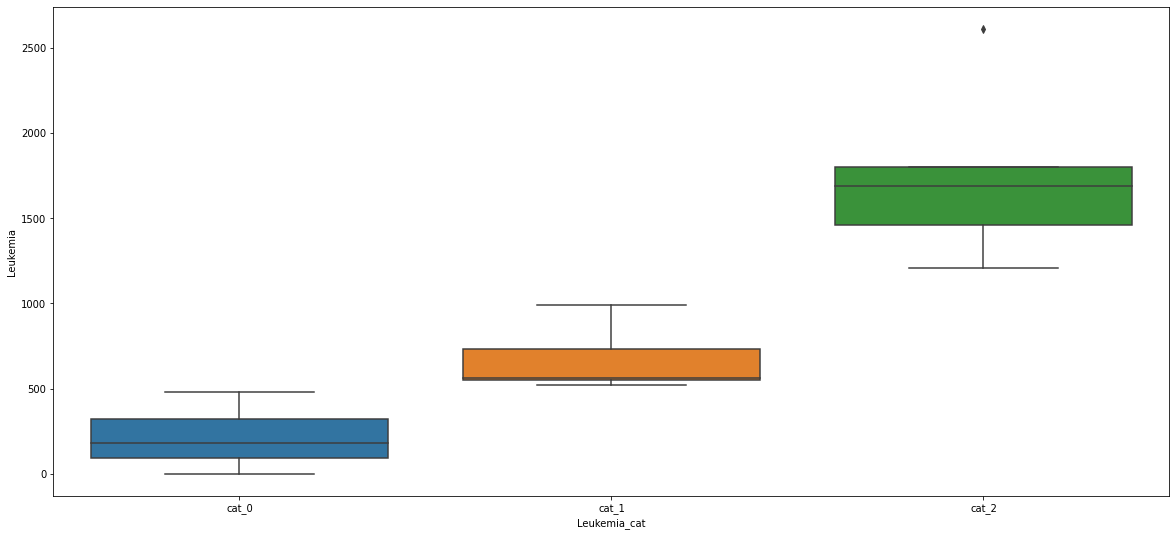

In [36]:
plt.figure(figsize=(20, 9))
sns.boxplot(df['Leukemia_cat'], df['Leukemia'])

(array([24., 17.,  5.,  1.,  1.,  1.,  1.,  0.,  0.,  1.]),
 array([   0.,  375.,  750., 1125., 1500., 1875., 2250., 2625., 3000.,
        3375., 3750.]),
 <a list of 10 Patch objects>)

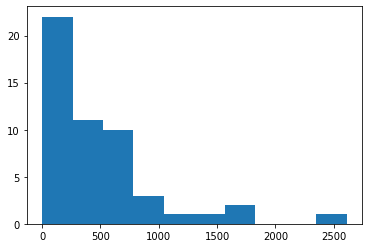

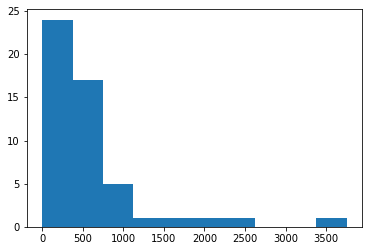

In [37]:
#norėjau pažiūrėt leukemia ir liver susirgimų kiekius
plt.hist(df['Leukemia'])
plt.figure()
plt.hist(df['Liver'])

In [38]:
df.skew()['Leukemia']

2.229123012533517

In [39]:
df.skew()['Liver']

2.8645362796173073

In [40]:
df.kurtosis()['Leukemia']


5.931209754054345

In [41]:
df.kurtosis()['Liver']



9.98969404083102

In [42]:
mm = pd.DataFrame()
mm['mean'] = df.mean()
mm['median'] = df.median()
mm

,mean,median
Brain/ nervous system,324.509804,250.000000
Female breast,795.882353,570.000000
Colon & rectum,985.294118,710.000000
Leukemia,479.803922,340.000000
Liver,565.294118,390.000000
Lung & bronchus,3056.862745,2450.000000
Non-Hodgkin Lymphoma,391.568627,290.000000
Ovary,272.941176,200.000000
Pancreas,845.294118,580.000000
Prostate,523.529412,370.000000


# IŠVADOS, HIPOTEZĖS PATVIRTINIMAS: 
(pristatyta skaidrėse).



# IDĖJOS TOLIMESNIAM DARBUI: 

jei turėčiau dataset'ą po 5 metų, galėčiau patikrinti kaip kistų vėžinių susirgimų pasiskirstymas.

# NAUJŲ KINTAMŲJŲ SUKŪRIMAS: 

buvo sukurta Leukemia_cat, kad suskirstyti pagal norimus rėžius.